In [1]:
#test on 
#https://github.com/DriftingPig/Drones/blob/globalist/obiwan_analysis/ang_corr/ipynb/200per_0125_validation_chunk21.ipynb

Populating the interactive namespace from numpy and matplotlib


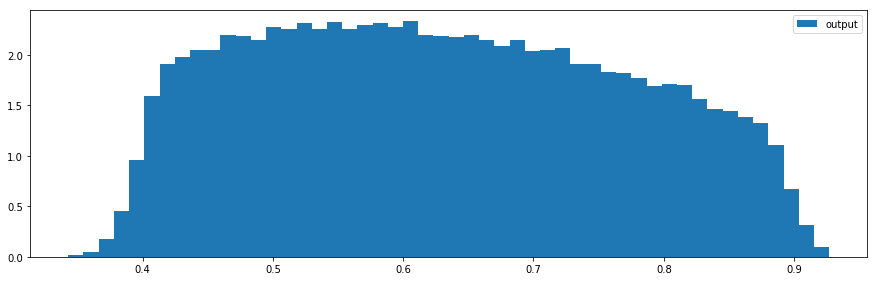

In [4]:
%pylab inline
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import numpy as np

topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
fn = 'eBOSS_ELG_full_ALL_v4.dat_cutted_really_masked_chunk21.fits'
fn_obiwan = 'elg_ngc_run_chunk23_really_masked.fits'
#DAT = fits.getdata(topdir+fn)
obiwan = fits.getdata(topdir+fn_obiwan)


def mag(mag,Type,data=obiwan): #Type='sim'/'obiwan'
    if Type is 'obiwan':
        mag_input = data
        g     = 22.5 - 2.5 * np.log10(data['flux_g'] / data['mw_transmission_g_1'])
        r_mag = 22.5 - 2.5 * np.log10(data['flux_r'] / data['mw_transmission_r_1'])
        z_mag = 22.5 - 2.5 * np.log10(data['flux_z'] / data['mw_transmission_z_1'])
        if mag == 'g':
            return g
        if mag == 'r':
            return r_mag
        if mag == 'z':
            return z_mag
    if Type is 'sim':
        g     = 22.5 - 2.5 * np.log10(data['sim_gflux'] / data['sim_mw_transmission_g'])
        r_mag = 22.5 - 2.5 * np.log10(data['sim_rflux'] / data['sim_mw_transmission_r'])
        z_mag = 22.5 - 2.5 * np.log10(data['sim_zflux'] / data['sim_mw_transmission_z'])
        if mag == 'g':
            return g
        if mag == 'r':
            return r_mag
        if mag == 'z':
            return z_mag
        
#g-r hist input,output (to ELG cut)
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.hist(mag('g','obiwan')-mag('r','obiwan'),label = 'output', bins = 50,stacked = False, normed = True)
plt.legend()

TypeError: '<' not supported between instances of 'NoneType' and 'float'

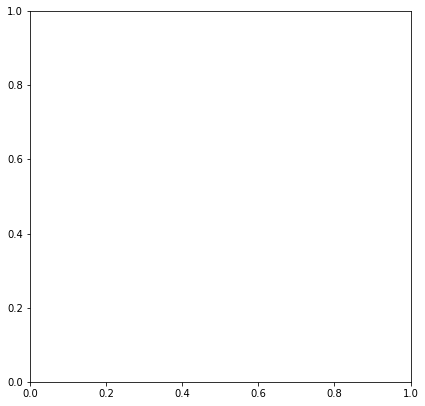

In [5]:

#g,r,z hist input,output (to ELG cut)
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.hist(mag(obiwan,'g'),label = 'output', bins = 50,stacked = False, normed = True)
plt.hist(obiwan['g'], label = 'input',bins = 50,stacked = False, normed = True, alpha=0.5)
plt.legend()
plt.title('g')

plt.subplot(2,2,2)
plt.hist(mag(obiwan,'r'),label = 'output', bins = 50,stacked = False, normed = True)
plt.hist(obiwan['r'], label = 'input',bins = 50,stacked = False, normed = True, alpha=0.5)
plt.legend()
plt.title('r')

plt.subplot(2,2,3)
plt.hist(mag(obiwan,'z'),label = 'output', bins = 50,stacked = False, normed = True)
plt.hist(obiwan['z'], label = 'input',bins = 50,stacked = False, normed = True, alpha=0.5)
plt.legend()
plt.title('z')

Text(0.5,1,'g mag diff hist')

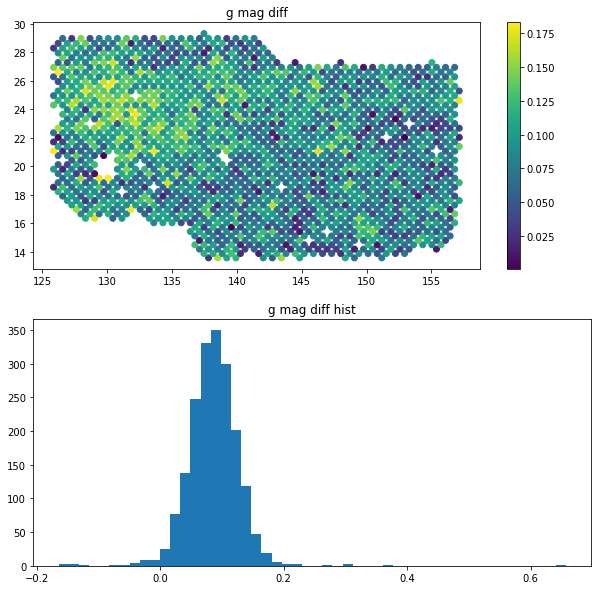

In [21]:
pixs = hp.ang2pix(128,obiwan['ra'],obiwan['dec'],nest = True, lonlat = True)
N = 12*128**2
hist_n = np.zeros(N)
hist_mag_diff_g = np.zeros(N)
hist_mag_diff_r = np.zeros(N)
hist_mag_diff_z = np.zeros(N)
mag_g = mag('g','obiwan')
mag_r =  mag('r','obiwan')
mag_z = mag('z','obiwan')

mag_g_sim = mag('g','sim')
mag_r_sim =  mag('r','sim')
mag_z_sim = mag('z','sim')

for i in range(len(pixs)):
    n = pixs[i]
    mag_diff_g = mag_g[i] - mag_g_sim[i]
    mag_diff_r = mag_r[i] - mag_r_sim[i]
    mag_diff_z = mag_z[i] - mag_z_sim[i]
    hist_mag_diff_g[n]+=mag_diff_g
    hist_mag_diff_r[n]+=mag_diff_r
    hist_mag_diff_z[n]+=mag_diff_z
    hist_n[n]+=1

ra,dec = hp.pix2ang(128,np.arange(N), nest = True,lonlat = True)
col1 = fits.Column(name = 'ra', array = ra, format = 'D')
col2 = fits.Column(name = 'dec', array = dec, format = 'D')
col3 = fits.Column(name = 'num', array = hist_n, format = 'D')
col4 = fits.Column(name = 'hist_mag_diff_g', array = hist_mag_diff_g, format = 'D')
col5 = fits.Column(name = 'hist_mag_diff_r', array = hist_mag_diff_r, format = 'D')
col6 = fits.Column(name = 'hist_mag_diff_z', array = hist_mag_diff_z, format = 'D')

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
dat = fits.BinTableHDU.from_columns([col1,col2,col3,col4,col5,col6]).data
sel = dat['num']
sel_num = (sel>0)
final = dat[sel_num]
hist_mag_diff_g_sel = final['hist_mag_diff_g']/final['num']
sel = (hist_mag_diff_g_sel>0.0)&(hist_mag_diff_g_sel<0.19)
super_final = final[sel]
sc = plt.scatter(super_final['ra'],super_final['dec'],c=super_final['hist_mag_diff_g']/super_final['num'])
plt.colorbar(sc)
plt.title('g mag diff')
plt.subplot(2,1,2)
pt = plt.hist(final['hist_mag_diff_g']/final['num'],bins = 50)
plt.title('g mag diff hist')

In [23]:
(final['hist_mag_diff_g']/final['num']).mean(),(final['hist_mag_diff_g']/final['num']).std()

(0.086527945119187488, 0.04195252505421742)

In [24]:
current_ccd_fn='/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/legacysurveydir_dr3/c-c-d-s/survey-ccds-ebossDR3_dr3.fits.gz'
dat = fits.getdata(current_ccd_fn)

In [25]:
len(dat)

213633

In [26]:
topdir_ccds='/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ebosselg_ccds/'
dr3_1= fits.getdata(topdir_ccds+'survey-ccds-dr3.fits.gz')
len(dr3_1)

206231

In [30]:
utah_sgc = topdir_ccds+'survey-ccds-dr3_utah_sgc.fits'
utah_sgc = fits.getdata(utah_sgc)
len(utah_sgc)

utah_ngc = topdir_ccds+'survey-ccds-dr3_utah_ngc.fits.gz'
utah_ngc = fits.getdata(utah_ngc)
len(utah_ngc)

5187

In [40]:
expnum=np.hstack((dr3_1['expnum'],utah_sgc['expnum'],utah_ngc['expnum']))
ccdname=np.hstack((dr3_1['ccdname'],utah_sgc['ccdname'],utah_ngc['ccdname']))

In [43]:

uniqid      = np.array([str(e)+'-'+n for e,n in zip(expnum,ccdname)])
keep        = np.unique(uniqid,return_index=True)[1]


In [45]:
len(keep)

213633

In [37]:
len(utah_ngc)

5187

In [3]:
import numpy as np
topdir0='/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/obiwan_corr/3d/corr_output/2PCF2/'
dat1=np.loadtxt(topdir0+'2PCF/2PCF_EZmock_eBOSS_ELG_eboss23GC_v4_z0.6z1.1_0444.dat')

Populating the interactive namespace from numpy and matplotlib


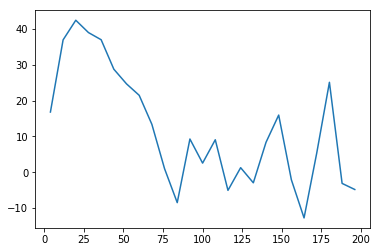

In [7]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as fits
from astropy.table import Table
plt.plot(dat1[:,0],dat1[:,1]*dat1[:,0]*dat1[:,0])

In [8]:
topdir0='/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/obiwan_corr/3d/corr_output/2PCF/'
dat1=np.loadtxt(topdir0+'2PCF_EZmock_eBOSS_ELG_eboss23GC_v4_z0.6z1.1_0444.dat')


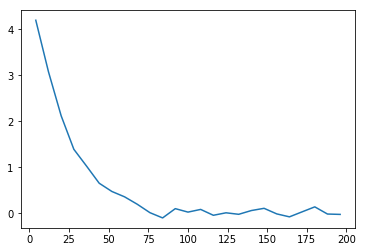

In [11]:
plt.plot(dat1[:,0],dat1[:,1]*dat1[:,0])

In [12]:
def get(f,td = topdir0):
    return np.loadtxt(topdir0+f)
dd = get('2PCF_EZmock_eBOSS_ELG_eboss23GC_v4_z0.6z1.1_0665.dd')
dr = get('2PCF_EZmock_eBOSS_ELG_eboss23GC_v4_z0.6z1.1_0665.dr')
rr = get('2PCF_EZmock_eBOSS_ELG_eboss23GC_v4_z0.6z1.1.rr')
ff = (dd[:,2]-2*dr[:,2]+rr[:,2])/rr[:,2]

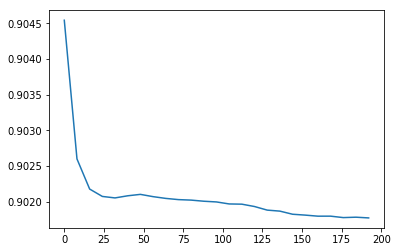

In [17]:
plt.plot(dd[:,0],ff)

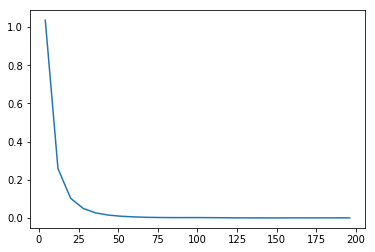

In [22]:
#x0 
def get(num,td = topdir0):
    f=np.loadtxt(topdir0+"2PCF_EZmock_eBOSS_ELG_eboss23GC_v4_z0.6z1.1_%04d.dat"%num).transpose()
    return f
x = get(1)[0]
y = np.zeros_like(x)
y_list=[]
for i in range(1,1001):
    y_i = get(i)[1]
    y+=y_i
    y_list.append(y_i)
y = y/1000
plt.plot(x,y)

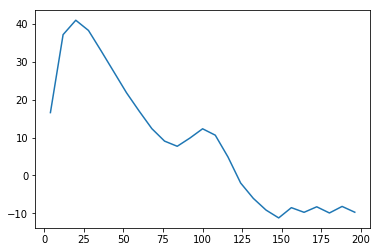

In [21]:
plt.plot(x,y*x*x)

In [24]:
y_list = np.array(y_list)
std_list = []
for i in range(len(y_list[0])):
    std_list.append(y_list[:,i].std())

<Container object of 3 artists>

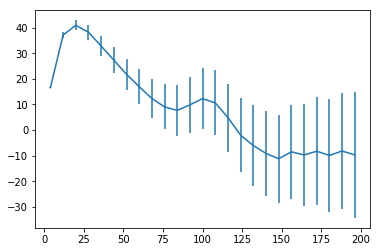

In [25]:
std_list=np.array(std_list)
plt.errorbar(x,y*x*x,std_list*x*x)

In [26]:
std_list

array([ 0.01829278,  0.00720572,  0.0049647 ,  0.00368443,  0.00300034,
        0.00256303,  0.00221554,  0.00191411,  0.00166545,  0.00152548,
        0.00141858,  0.00129346,  0.00117787,  0.0010887 ,  0.00098874,
        0.00093939,  0.00090595,  0.00085157,  0.00078571,  0.00075334,
        0.00074198,  0.00071028,  0.00068192,  0.00064434,  0.0006407 ])

2

In [ ]:
#correlation function maker,xi
def xi0(i):
    topdir0='/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/obiwan_corr/3d/corr_output/2PCF/'
    f=np.loadtxt(topdir0+"2PCF_EZmock_eBOSS_ELG_eboss23GC_v4_z0.6z1.1_%04d.dat"%num).transpose()
    return f[0],f[1]
def xi2(i):
    topdir0='/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/obiwan_corr/3d/corr_output/2PCF/'
    f=np.loadtxt(topdir0+"2PCF_EZmock_eBOSS_ELG_eboss23GC_v4_z0.6z1.1_%04d.dat"%num).transpose()
    return f[0],f[2]
def xi4(i):
    topdir0='/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/obiwan_corr/3d/corr_output/2PCF2/2PCF/'
    f=np.loadtxt(topdir0+"2PCF_EZmock_eBOSS_ELG_eboss23GC_v4_z0.6z1.1_%04d.dat"%num).transpose()
    return f[0],f[2]
def M_ij(i,j,xi):
    x_list,_ = eval(xi+'('+str(n)+')')
    y_list=[]
    for n in range(1,1001):
        x,y=eval(xi+'('+str(n)+')')
        y_list.append(y)
    y_list = np.array(y_list)
    std_list = []
        

Populating the interactive namespace from numpy and matplotlib


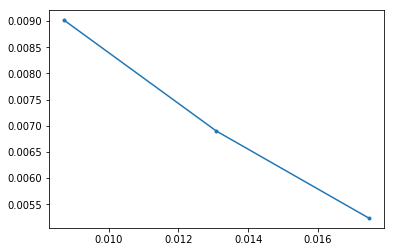

In [10]:
%pylab inline
import matplotlib.pyplot as plt
fn='/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/obiwan_corr/corr_output/des_stuff2_uniform.out'
fn2='/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/py/obiwan/Drones/obiwan_analysis/ang_corr_v2/jack.out'
import numpy as np
d1=np.loadtxt(fn)
d2=np.loadtxt(fn2).transpose()
plt.plot(d1[0],d1[1],marker='.')
#plt.plot(d2[2],d2[3])

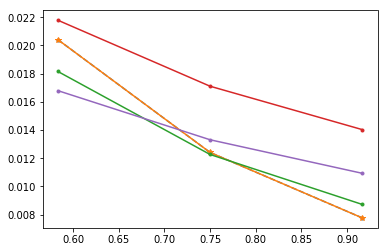

In [16]:
plt.plot(d2[2][:3],d2[3][:3],marker='.',linestyle='--')
plt.plot(d2[2][:3],d2[3][:3],marker='*')
plt.plot(d2[2][3:6],d2[3][3:6],marker='.')
plt.plot(d2[2][6:9],d2[3][6:9],marker='.')
plt.plot(d2[2][9:12],d2[3][9:12],marker='.')

In [1]:
#May 24
%pylab inline
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [14]:
#make correlation functions for x0
topdir0='/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/obiwan_corr/3d/corr_output/2PCF/'
def get(num,td = topdir0):
    f=np.loadtxt(topdir0+"2PCF_EZmock_eBOSS_ELG_eboss23GC_v4_z0.6z1.1_%04d.dat"%num).transpose()
    return f
x = get(1)[0]
y = np.zeros(len(x)*len(x)).reshape(len(x),len(x))
y_mean = 0
for i in range(1,1001):
    y_i = get(i)[1]
    y_mean+=y_i
y_mean = y_mean/1000.

for k in range(1,1001):
            y_k=get(k)[1]
            y+=np.outer(y_k-y_mean, y_k-y_mean)
y = y/999.

In [10]:
for i in range(len(x)):
    for j in range(len(x)):
        for k in range(1,1001):
            y_k=get(k,0)[1]
            y[i][j]+=(y_k[i]-y_mean[i])*(y_k[j]-y_mean[j])

In [11]:
x

array([   4.,   12.,   20.,   28.,   36.,   44.,   52.,   60.,   68.,
         76.,   84.,   92.,  100.,  108.,  116.,  124.,  132.,  140.,
        148.,  156.,  164.,  172.,  180.,  188.,  196.])

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as fits
from astropy.table import Table

Populating the interactive namespace from numpy and matplotlib


In [2]:
raw_topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
data_name = raw_topdir+'eBOSS_ELG_full_ALL_v4.dat_really_masked_chunk23_elg_ngc_run.fits'
obiwan_name = raw_topdir+'elg_ngc_run_chunk23_really_masked.fits'
dat = fits.getdata(data_name)
obiwan = fits.getdata(obiwan_name)

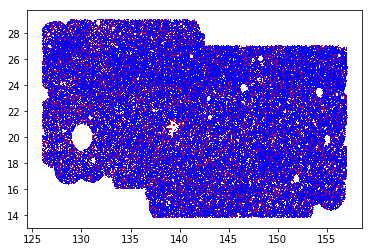

In [5]:
plt.plot(dat['ra'],dat['dec'],'r,')
plt.plot(obiwan['ra'],obiwan['dec'],'b,')

In [6]:
len(obiwan)

86923

In [ ]:
86923 86923

In [ ]:
/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/elg_ngc_run/tractor/brickname[:3]/brickname,rs_type,'tractor-%s.fits' %brickname

In [10]:
!ls /global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/elg_ngc_run/tractor/135/1356p232/more_rs201/

brick-1356p232.sha256sum  tractor-1356p232.fits


In [16]:
fn = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/elg_ngc_run/tractor/135/1356p232/more_rs201/tractor-1356p232.fits'
dat0 = fits.getdata(fn)

In [12]:
len(dat)

175

In [13]:
fn = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/elg_ngc_run/tractor/135/1356p232/more_rs0/tractor-1356p232.fits'
dat = fits.getdata(fn)

In [14]:
len(dat)

106

(23, 23.5)

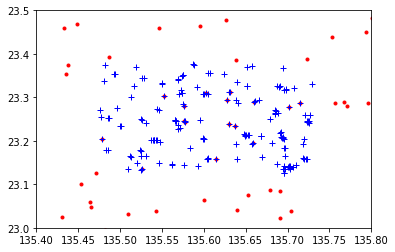

In [118]:
dat = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/elg_ngc_run_chunk23_really_masked_part2.fits')
plt.plot(dat['ra'],dat['dec'],'r.')
plt.plot(dat0['ra'],dat0['dec'],'b+')
plt.gca().set_xlim((135.4,135.8))
plt.gca().set_ylim((23,23.5))

In [35]:
len(dat)

96921

In [92]:
fn1 = raw_topdir +'elg_ngc_run_chunk23_really_masked.fits'
fn2 = raw_topdir + 'elg_ngc_run_chunk23_really_masked_part1.fits'
fn3 = raw_topdir + 'eBOSS_ELG_clustering_eboss23_v4.dat.fits'
fn4 = raw_topdir + 'sim_elg_ngc_run_chunk23.fits'

In [93]:
dat1 = fits.getdata(fn1)
dat2 = fits.getdata(fn2)
dat3 = fits.getdata(fn3)
dat4 = fits.getdata(fn4)

In [94]:
set(dat3['brickname']) - set(dat1['brickname'])

{'1274p167',
 '1296p207',
 '1303p165',
 '1312p182',
 '1316p165',
 '1387p207',
 '1390p205',
 '1394p210',
 '1394p212',
 '1425p280',
 '1429p230',
 '1462p270',
 '1465p270',
 '1490p137',
 '1569p162',
 '1570p160'}

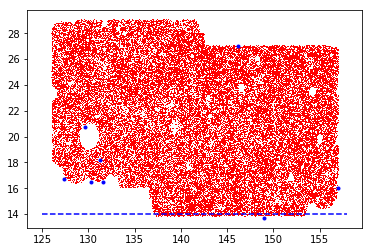

In [99]:
plt.plot(dat3['ra'],dat3['dec'],'r,')
#plt.plot(dat4['ra'],dat4['dec'],'k,')
#plt.gca().set_ylim((13.5,16))
plt.plot(np.arange(125,158,0.1),[14]*len(np.arange(125,158,0.1)),'b--')
plt.plot([127.4,129.6,130.3,131.2,131.6,157,146.2,149],[16.7,20.7,16.5,18.2,16.5,16,27,13.7],'b.')

In [ ]:
set(dat1['brickname'])-set(dat2['brickname'])-(set(dat1['brickname'])-set(dat3['brickname']))

In [53]:
set(dat1['brickname'])-set(dat3['brickname'])

{'1259p192',
 '1273p290',
 '1279p240',
 '1281p205',
 '1290p177',
 '1293p207',
 '1314p165',
 '1316p290',
 '1368p142',
 '1390p290',
 '1391p202',
 '1399p290',
 '1405p137',
 '1426p277',
 '1428p137',
 '1496p165',
 '1503p137',
 '1569p185',
 '1569p205',
 '1570p215',
 '1570p232'}

In [54]:
set(dat2['brickname'])-set(dat3['brickname'])

{'1259p192',
 '1273p290',
 '1279p240',
 '1281p205',
 '1290p177',
 '1293p207',
 '1314p165',
 '1316p290',
 '1368p142',
 '1390p290',
 '1391p202',
 '1399p290',
 '1405p137',
 '1426p277',
 '1428p137',
 '1496p165',
 '1503p137',
 '1569p185',
 '1569p205',
 '1570p177',
 '1570p215',
 '1570p232'}

In [43]:
len(set(dat1['brickname']))

6159

In [44]:
len(dat1)

76194

In [45]:
len(dat2)

76194

In [96]:
dat = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/eboss_elg/ngc_randoms/randoms_seed_100_startid_2.fits')

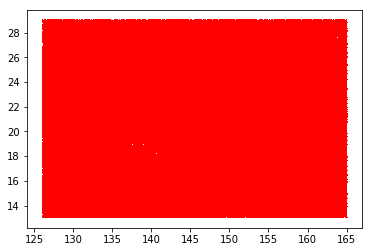

In [97]:
plt.plot(dat['ra'],dat['dec'],'r,')

In [126]:
#cut everything to dec>14
raw_topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
fn1 = raw_topdir + 'elg_ngc_run_chunk23_really_masked_part2.fits'
fn2 = raw_topdir + 'sim_elg_ngc_run_chunk23_really_masked_part2.fits'
fn3 = raw_topdir + 'eBOSS_ELG_full_ALL_v4.dat_really_masked_chunk23_elg_ngc_run_part2.fits'
fn4 = raw_topdir + 'elg_ngc_run_chunk23_really_masked_part1.fits'
fn5 = raw_topdir + 'sim_elg_ngc_run_chunk23_really_masked_part1.fits'
fn6 = raw_topdir + 'eBOSS_ELG_full_ALL_v4.dat_really_masked_chunk23_elg_ngc_run_part1.fits'

obiwan1 = fits.getdata(fn1)
sim1 = fits.getdata(fn2)
dat1 = fits.getdata(fn3)
obiwan2 = fits.getdata(fn4)
sim2 = fits.getdata(fn5)
dat2 = fits.getdata(fn6)

In [116]:
len(dat1),len(dat2),len(obiwan1),len(obiwan2),len(sim1),len(sim2)

(76194, 76194, 96921, 86923, 407769, 364061)

(13.75, 14.1)

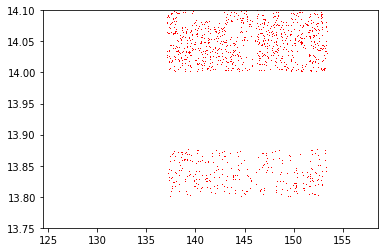

In [140]:
plt.plot(obiwan1['ra'],obiwan1['dec'],'r,')
plt.gca().set_ylim((13.75,14.1))

(13.9, 14.0)

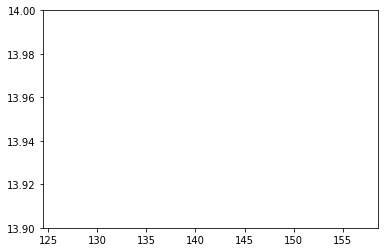

In [125]:
plt.plot(obiwan1['ra'],obiwan1['dec'],'r,')
plt.gca().set_ylim((13.9,14.))

In [138]:
dd = dat1[(dat1['dec']>13.9)&(dat1['dec']<14.0)]
bricknames = np.array(list(set(dd['brickname'])),dtype = np.str)
np.savetxt('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/py/obiwan/more/randoms_division/fourteen.txt',bricknames,fmt="%s")

In [139]:
fn = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/eboss_elg/ngc_randoms_per_brick/brick_1453p140.fits'
dat = fits.getdata(fn)
dat['dec'].min()

13.875071689756183

(13.75, 14.0)

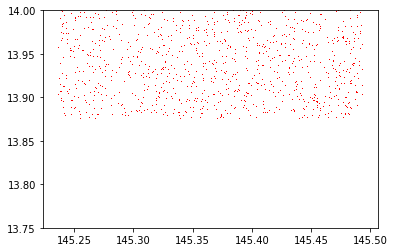

In [144]:
plt.plot(dat['ra'],dat['dec'],'r,')
plt.gca().set_ylim((13.75,14.))

In [148]:
raw_topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
obiwan_name = raw_topdir+'elg_ngc_run_chunk23_really_masked.fits'
obiwan = fits.getdata(obiwan_name)

fn1 = raw_topdir + 'elg_ngc_run_chunk23_really_masked_part2.fits'
obiwan1 = fits.getdata(fn1)

bricknames = np.loadtxt('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/py/obiwan/more/randoms_division/fourteen.txt',dtype=np.str)


96921
95874
95874


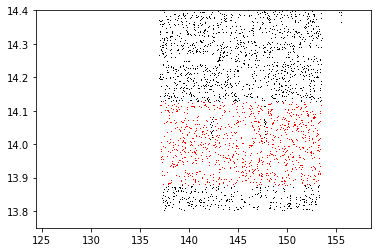

In [167]:
flag = np.ones(len(obiwan1),dtype = np.bool)
print(flag.sum())
for brickname in bricknames:
    flag[np.where(obiwan1['brickname']==brickname)[0]] = False
print(flag.sum())
obiwan_sel = np.array(obiwan1[flag])
print(len(obiwan_sel))
plt.plot(obiwan_sel['ra'],obiwan_sel['dec'],'k,')
plt.gca().set_ylim((13.75,14.4))
plt.plot(obiwan['ra'],obiwan['dec'],'r,')

In [175]:
dd = np.hstack((obiwan_sel,obiwan))

In [178]:
95874+len(obiwan)

96888

In [180]:
fits.BinTableHDU.from_columns(fits.ColDefs(np.array(dd)))\
.writeto(raw_topdir+'elg_ngc_run_chunk23_really_masked_sticked.fits')

In [169]:
set(obiwan_sel[(obiwan_sel['dec']<14.1)&(obiwan_sel['dec']>13.9)]['brickname'])

{b'1422p140', b'1476p140'}

In [170]:
obiwan_sel[(obiwan_sel['dec']<14.1)&(obiwan_sel['dec']>13.9)]['brickname'][0]

b'1476p140'

407769
403648


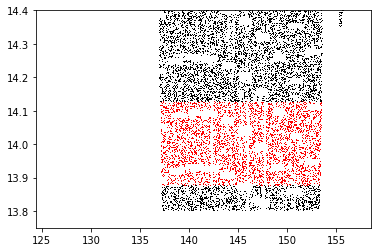

In [188]:
raw_topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
obiwan_name = raw_topdir+'sim_elg_ngc_run_chunk23_really_masked.fits'
obiwan = fits.getdata(obiwan_name)

fn1 = raw_topdir + 'sim_elg_ngc_run_chunk23_really_masked_part2.fits'
obiwan1 = fits.getdata(fn1)

bricknames = np.loadtxt('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/py/obiwan/more/randoms_division/fourteen.txt',dtype=np.str)

print(len(obiwan1))
obiwan_sel = obiwan1[~((obiwan1['dec']<obiwan['dec'].max())&(obiwan1['dec']>obiwan['dec'].min()))]
print(len(obiwan_sel))
plt.plot(obiwan_sel['ra'],obiwan_sel['dec'],'k,')
plt.gca().set_ylim((13.75,14.4))
plt.plot(obiwan['ra'],obiwan['dec'],'r,')

dd = np.hstack((obiwan_sel,obiwan))
fits.BinTableHDU.from_columns(fits.ColDefs(np.array(dd)))\
.writeto(raw_topdir+'sim_elg_ngc_run_chunk23_really_masked_sticked.fits',overwrite=True)


(13.7, 14.4)

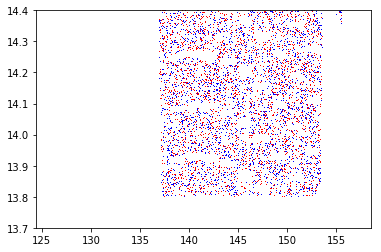

In [192]:
d1 = fits.getdata(raw_topdir+'elg_ngc_run_chunk23_really_masked_sticked.fits')
d2 = fits.getdata(raw_topdir+'elg_ngc_run_chunk23_really_masked_part1.fits')
plt.plot(d1['ra'],d1['dec'],'r,')
plt.plot(d2['ra'],d2['dec'],'b,')
plt.gca().set_ylim(13.7,14.4)

In [193]:
#stack these to get a final ngc version!
ddd = np.hstack((d1,d2))
fits.BinTableHDU.from_columns(fits.ColDefs(np.array(ddd)))\
.writeto(raw_topdir+'elg_ngc_run_chunk23_really_masked_combined.fits',overwrite=True)

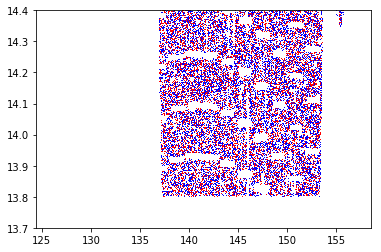

In [198]:
d1 = fits.getdata(raw_topdir+'sim_elg_ngc_run_chunk23_really_masked_sticked.fits')
d2 = fits.getdata(raw_topdir+'sim_elg_ngc_run_chunk23_really_masked_part1.fits')
plt.plot(d1['ra'],d1['dec'],'r,')
plt.plot(d2['ra'],d2['dec'],'b,')
plt.gca().set_ylim(13.7,14.4)

ddd = np.hstack((d1,d2))
fits.BinTableHDU.from_columns(fits.ColDefs(np.array(ddd)))\
.writeto(raw_topdir+'sim_elg_ngc_run_chunk23_really_masked_combined.fits',overwrite=True)

In [ ]:
eBOSS_ELG_clustering_eboss23_v5.dat_obiwan_weight.fits
eBOSS_ELG_clustering_eboss23_v5.ran_obiwan_weight.fits
elg_ngc_run_chunk23_really_masked_combined_obiwan_weight.fits



In [199]:
raw_topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
obiwan_name = raw_topdir+'elg_ngc_run_chunk23_really_masked.fits'
obiwan = fits.getdata(obiwan_name)

fn1 = raw_topdir + 'elg_ngc_run_chunk23_really_masked_part2.fits'
obiwan1 = fits.getdata(fn1)

bricknames = np.loadtxt('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/py/obiwan/more/randoms_division/fourteen.txt',dtype=np.str)



In [219]:
import subprocess
tractor_dir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/elg_ngc_run/tractor/'
for brickname in bricknames:
    tractor_good = tractor_dir+brickname[:3]+'/'+brickname+'/more_rs202/tractor-'+brickname+'.fits'
    tractor_bad = tractor_dir+brickname[:3]+'/'+brickname+'/more_rs201/tractor-'+brickname+'.fits'
    subprocess.call(["cp",tractor_good,tractor_bad])

In [218]:
import subprocess
sim_dir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/elg_ngc_run/obiwan/'
for brickname in bricknames:
    tractor_good = sim_dir+brickname[:3]+'/'+brickname+'/more_rs202/simcat-elg-'+brickname+'.fits'
    tractor_bad = sim_dir+brickname[:3]+'/'+brickname+'/more_rs201/simcat-elg-'+brickname+'.fits'
    subprocess.call(["cp",tractor_good,tractor_bad])

In [220]:
'1404p140' in bricknames

True

In [206]:
tractor_good = tractor_dir+bricknames[0][:3]+'/'+bricknames[0]+'/more_rs201/tractor-'+bricknames[0]+'.fits'

In [207]:
tractor_good

'/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/elg_ngc_run/tractor/140/1404p140/more_rs201/tractor-1404p140.fits'

In [208]:
d = fits.getdata(tractor_good)

In [211]:
d.columns

ColDefs(
    name = 'release'; format = 'I'
    name = 'brickid'; format = 'J'
    name = 'brickname'; format = '8A'
    name = 'objid'; format = 'J'
    name = 'brick_primary'; format = 'L'
    name = 'type'; format = '4A'
    name = 'ra'; format = 'D'; unit = 'deg'
    name = 'dec'; format = 'D'; unit = 'deg'
    name = 'ra_ivar'; format = 'E'; unit = '1/deg^2'
    name = 'dec_ivar'; format = 'E'; unit = '1/deg^2'
    name = 'bx'; format = 'E'
    name = 'by'; format = 'E'
    name = 'dchisq'; format = '5E'
    name = 'ebv'; format = 'E'; unit = 'mag'
    name = 'mjd_min'; format = 'D'
    name = 'mjd_max'; format = 'D'
    name = 'flux_u'; format = 'E'; unit = 'nanomaggy'
    name = 'flux_g'; format = 'E'; unit = 'nanomaggy'
    name = 'flux_r'; format = 'E'; unit = 'nanomaggy'
    name = 'flux_i'; format = 'E'; unit = 'nanomaggy'
    name = 'flux_z'; format = 'E'; unit = 'nanomaggy'
    name = 'flux_Y'; format = 'E'; unit = 'nanomaggy'
    name = 'flux_ivar_u'; format = 'E'; unit =

In [ ]:
flux_ivar_u,g,r,i,z,Y,z 

In [216]:
!source /global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/py/obiwan/Drones/DRONES_ENV.sh

In [217]:
!source /global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/py/obiwan/Drones/DRONES_ENV.sh
import sys
sys.path.append('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/py/obiwan/Drones/obiwan_analysis/preprocess/collect/')
import collect

KeyError: 'DRONES_ACTIVATION'

In [224]:
!ls /global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/elg_ngc_run/obiwan/140/1407p140/more_rs202

metacat-elg-1407p140.fits  sim_ids_added.fits  simcat-elg-1407p140.fits


In [226]:
ddd = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/elg_ngc_run_chunk23_really_masked.fits')
ddd.columns

ColDefs(
    name = 'release'; format = 'I'
    name = 'brickid'; format = 'J'
    name = 'brickname'; format = '8A'
    name = 'objid'; format = 'J'
    name = 'brick_primary'; format = 'L'
    name = 'type'; format = '4A'
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'ra_ivar'; format = 'E'
    name = 'dec_ivar'; format = 'E'
    name = 'bx'; format = 'E'
    name = 'by'; format = 'E'
    name = 'dchisq'; format = '5E'
    name = 'ebv'; format = 'E'
    name = 'mjd_min'; format = 'D'
    name = 'mjd_max'; format = 'D'
    name = 'flux_u'; format = 'E'
    name = 'flux_g'; format = 'E'
    name = 'flux_r'; format = 'E'
    name = 'flux_i'; format = 'E'
    name = 'flux_z'; format = 'E'
    name = 'flux_Y'; format = 'E'
    name = 'flux_ivar_u'; format = 'E'
    name = 'flux_ivar_g'; format = 'E'
    name = 'flux_ivar_r'; format = 'E'
    name = 'flux_ivar_i'; format = 'E'
    name = 'flux_ivar_z'; format = 'E'
    name = 'flux_ivar_Y'; format = 'E'
    name =

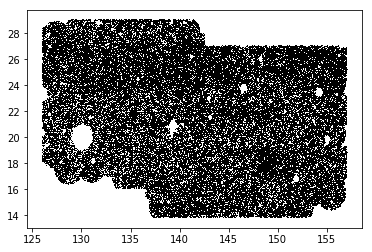

In [227]:
plt.plot(ddd['ra'],ddd['dec'],'k,')

In [228]:
ddd['nn_redshift']

KeyError: "Key 'nn_redshift' does not exist."

In [10]:
brickname = '3531m015'
topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/mpi4py_run_chunk21_new_calib_new/'
fn = topdir+'tractor/'+brickname[:3]+'/'+brickname+'/more_rs0/'+'tractor-'+brickname+'.fits'
fn2 = topdir+'obiwan/'+brickname[:3]+'/'+brickname+'/more_rs0/'+'simcat-elg-'+brickname+'.fits'



In [11]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as fits
from astropy.table import Table
dat = fits.getdata(fn)

Populating the interactive namespace from numpy and matplotlib


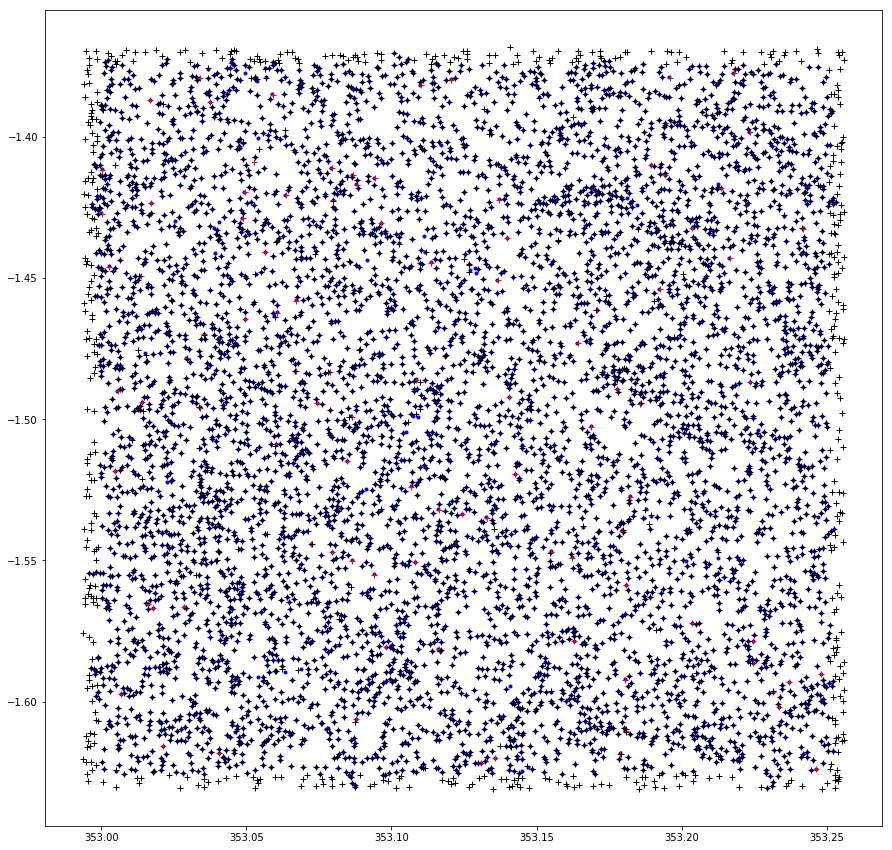

In [14]:
plt.figure(figsize = (15,15))
plt.plot(dat['ra'],dat['dec'],'b.')
dat2=fits.getdata(fn2)
plt.plot(dat2['ra'],dat2['dec'],'r+')

topdir3='/global/project/projectdirs/cosmo/data/legacysurvey/dr3/tractor/'
fn3 = topdir3+brickname[:3]+'/tractor-'+brickname+'.fits'
dat3=fits.getdata(fn3)
plt.plot(dat3['ra'],dat3['dec'],'k+')

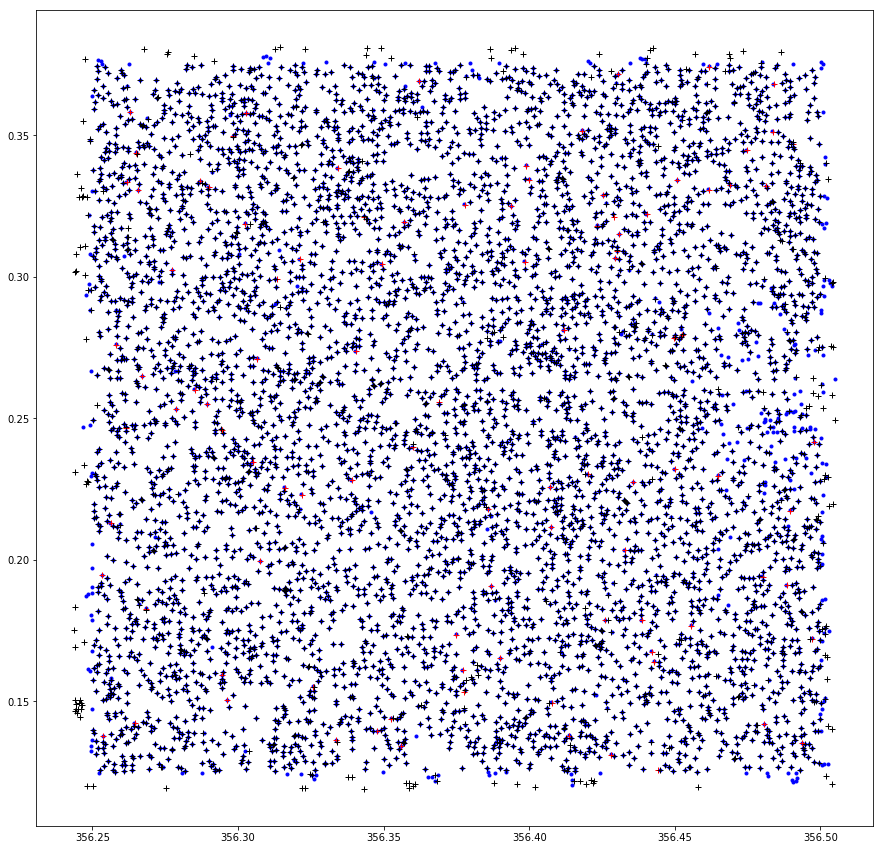

In [20]:
brickname='3563p002'

topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/mpi4py_run_chunk21_new_calib_new/'
fn = topdir+'tractor/'+brickname[:3]+'/'+brickname+'/more_rs0/'+'tractor-'+brickname+'.fits'
fn2 = topdir+'obiwan/'+brickname[:3]+'/'+brickname+'/more_rs0/'+'simcat-elg-'+brickname+'.fits'

plt.figure(figsize = (15,15))
dat = fits.getdata(fn)
plt.plot(dat['ra'],dat['dec'],'b.')
dat2=fits.getdata(fn2)
plt.plot(dat2['ra'],dat2['dec'],'r+')

topdir3='/global/project/projectdirs/cosmo/data/legacysurvey/dr3/tractor/'
fn3 = topdir3+brickname[:3]+'/tractor-'+brickname+'.fits'
dat3=fits.getdata(fn3)
plt.plot(dat3['ra'],dat3['dec'],'k+')


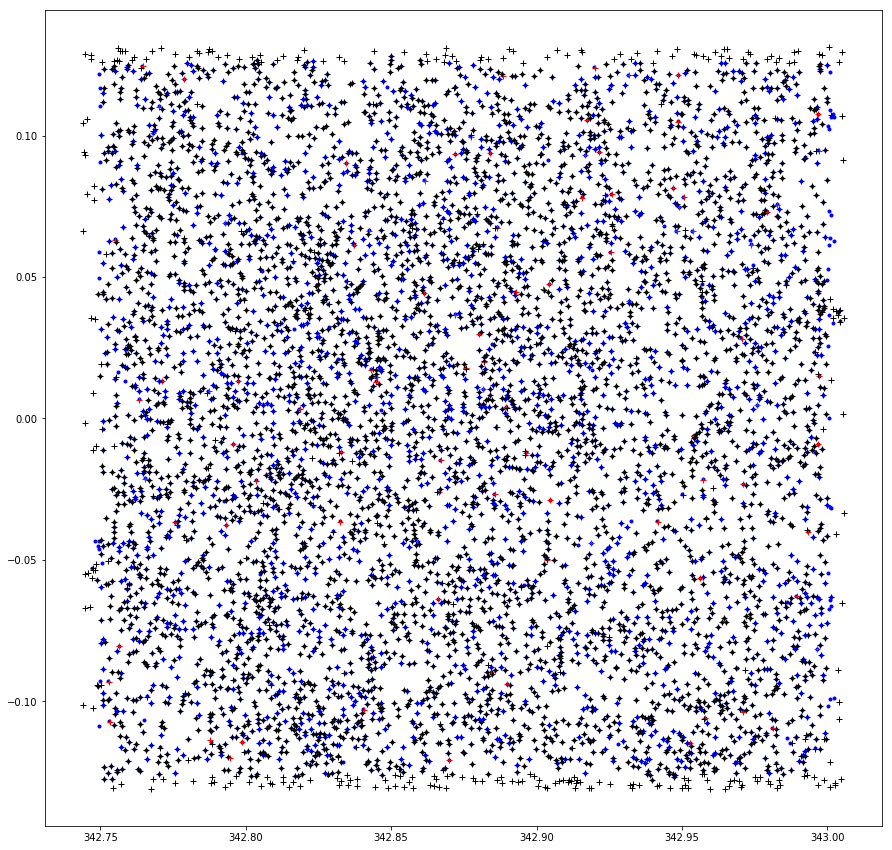

In [21]:
brickname='3428p000'

topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/mpi4py_run_chunk21_new_calib_new/'
fn = topdir+'tractor/'+brickname[:3]+'/'+brickname+'/more_rs0/'+'tractor-'+brickname+'.fits'
fn2 = topdir+'obiwan/'+brickname[:3]+'/'+brickname+'/more_rs0/'+'simcat-elg-'+brickname+'.fits'

plt.figure(figsize = (15,15))
dat = fits.getdata(fn)
plt.plot(dat['ra'],dat['dec'],'b.')
dat2=fits.getdata(fn2)
plt.plot(dat2['ra'],dat2['dec'],'r+')

topdir3='/global/project/projectdirs/cosmo/data/legacysurvey/dr3/tractor/'
fn3 = topdir3+brickname[:3]+'/tractor-'+brickname+'.fits'
dat3=fits.getdata(fn3)
plt.plot(dat3['ra'],dat3['dec'],'k+')


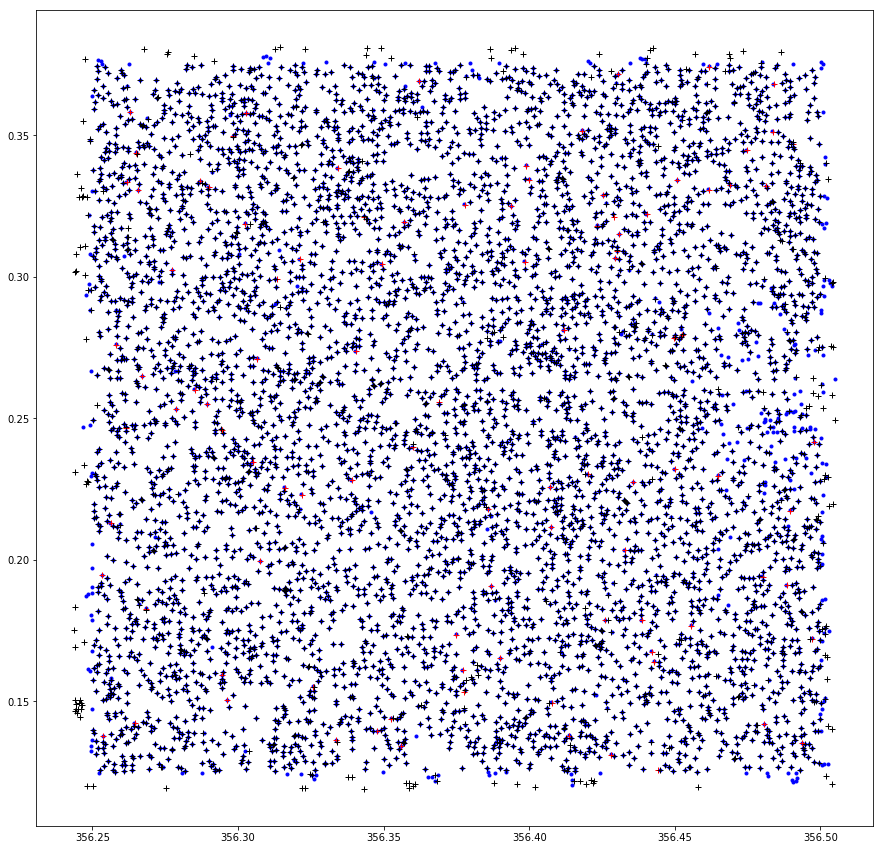

In [41]:
brickname='3563p002'

topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/mpi4py_run_chunk21_new_calib_new/'
fn = topdir+'tractor/'+brickname[:3]+'/'+brickname+'/more_rs0/'+'tractor-'+brickname+'.fits'
fn2 = topdir+'obiwan/'+brickname[:3]+'/'+brickname+'/more_rs0/'+'simcat-elg-'+brickname+'.fits'

plt.figure(figsize = (15,15))
dat = fits.getdata(fn)
plt.plot(dat['ra'],dat['dec'],'b.')
dat2=fits.getdata(fn2)
plt.plot(dat2['ra'],dat2['dec'],'r+')

topdir3='/global/project/projectdirs/cosmo/data/legacysurvey/dr3/tractor/'
fn3 = topdir3+brickname[:3]+'/tractor-'+brickname+'.fits'
dat3=fits.getdata(fn3)
plt.plot(dat3['ra'],dat3['dec'],'k+')

3563p002
/global/project/projectdirs/cosmo/data/legacysurvey/dr3/tractor/356/tractor-3563p002.fits


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in greater
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in less
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:17: 

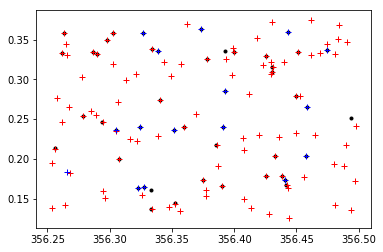

In [40]:
def select_ELG( path_2_tractor_file , region = 'sgc'):
    """
    Given the path to a tractor catalog, it returns two sub catalogs with the eBOSS ELG selections applied (NGC and SGC).
    """
    import numpy as n
    # opens the tractor file
    hdu=fits.open(path_2_tractor_file)
    dat=hdu[1].data
    hdu.close()
    # the color color selection
    g     = 22.5 - 2.5 * n.log10(dat['flux_g'] / dat['mw_transmission_g'])
    r_mag = 22.5 - 2.5 * n.log10(dat['flux_r'] / dat['mw_transmission_r'])
    z_mag = 22.5 - 2.5 * n.log10(dat['flux_z'] / dat['mw_transmission_z'])
    gr = g - r_mag
    rz = r_mag - z_mag
    color_sgc = (g>21.825)&(g<22.825)&(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.218*gr+0.571<rz)&(rz<-0.555*gr+1.901)
    color_ngc = (g>21.825)&(g<22.9)  &(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.637*gr+0.399<rz)&(rz<-0.555*gr+1.901)
    # the junk rejection criterion
    noJunk = (dat['brick_primary']) & (dat['anymask_g']==0) & (dat['anymask_r']==0) & (dat['anymask_z']==0) #& (dat['TYCHO2INBLOB']==False)
    # the low depth region rejection
    value_g=dat['psfdepth_g']
    value_r=dat['psfdepth_r']
    value_z=dat['psfdepth_z']
    gL = 62.79716079
    rL = 30.05661087
    zL_ngc = 11.0
    zL_sgc = 12.75
    depth_selection_ngc = (value_g > gL) & (value_r > rL) & (value_z > zL_ngc)
    depth_selection_sgc = (value_g > gL) & (value_r > rL) & (value_z > zL_sgc)
    # final selection boolean array :
    selection_sgc =(noJunk)&(color_sgc)&(depth_selection_sgc)
    selection_ngc =(noJunk)&(color_ngc)&(depth_selection_ngc)
    # returns the catalogs of ELGs
    if region == 'sgc':
        if len(selection_sgc.nonzero()[0])>0:
            flag = True
            return flag, dat[selection_sgc]
        else:
            flag = False
            return flag, dat[selection_sgc]
    if region == 'ngc':
            if len(selection_ngc.nonzero()[0])>0 :
                flag = True
                return flag, dat[selection_ngc]
            else:
                flag = False
                return flag, dat[selection_ngc]
            





import os
def ELG_selection_for_dr3(brickname,region='sgc'):
    print(brickname)
    import numpy as n
    topdir3='/global/project/projectdirs/cosmo/data/legacysurvey/dr3/tractor/'
    dr3_tractor_dir=topdir3
    print(os.path.join(dr3_tractor_dir,brickname[:3],'tractor-'+brickname+'.fits'))
    try:
        tractor = fits.getdata(os.path.join(dr3_tractor_dir,brickname[:3],'tractor-'+brickname+'.fits'))
        
    except:
        print('NOTICE:brick %s does not exist' %brickname)
        return False,None
    # opens the tractor file
    #hdu=fits.open(path_2_tractor_file)
    #dat=hdu[1].data
    #hdu.close()

    noJunk = (tractor['brick_primary'])&(tractor['decam_anymask'][:,1]==0)&(tractor['decam_anymask'][:,2]==0)&(tractor['decam_anymask'][:,4]==0)&(tractor['tycho2inblob']==False)
    value_g=tractor['decam_depth'][:,1]
    value_r=tractor['decam_depth'][:,2]
    value_z=tractor['decam_depth'][:,4]
    gL = 62.79716079
    rL = 30.05661087
    zL_ngc = 11.0
    zL_sgc = 12.75
    depth_selection_ngc = (value_g > gL) & (value_r > rL) & (value_z > zL_ngc)
    depth_selection_sgc = (value_g > gL) & (value_r > rL) & (value_z > zL_sgc)

    # the color color selection
    g     = 22.5 - 2.5 * n.log10(tractor['decam_flux'][:,1] / tractor['decam_mw_transmission'][:,1])
    r_mag = 22.5 - 2.5 * n.log10(tractor['decam_flux'][:,2] / tractor['decam_mw_transmission'][:,2])
    z_mag = 22.5 - 2.5 * n.log10(tractor['decam_flux'][:,4] / tractor['decam_mw_transmission'][:,4])
    gr = g - r_mag
    rz = r_mag - z_mag
    color_sgc = (g>21.825)&(g<22.825)&(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.218*gr+0.571<rz)&(rz<-0.555*gr+1.901)
    color_ngc = (g>21.825)&(g<22.9)  &(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.637*gr+0.399<rz)&(rz<-0.555*gr+1.901)
    # final selection boolean array :
    selection_sgc =(noJunk)&(color_sgc)&(depth_selection_sgc)
    selection_ngc =(noJunk)&(color_ngc)&(depth_selection_ngc)
    if region == 'sgc':
        if len(selection_sgc.nonzero()[0])>0:
            flag = True
            return flag, Table(tractor[selection_sgc.astype(bool)])
        else:
            flag = False
            return flag, Table(tractor[selection_sgc.astype(bool)])
    if region == 'ngc':
            if len(selection_ngc.nonzero()[0])>0 :
                flag = True
                return flag, Table(tractor[selection_ngc.astype(bool)])
            else:
                flag = False
                return flag, Table(tractor[selection_ngc.astype(bool)])
            
            
f,d = select_ELG(fn)
plt.plot(d['ra'],d['dec'],'k.')
plt.plot(dat2['ra'],dat2['dec'],'r+')

f,dd = ELG_selection_for_dr3(brickname)
plt.plot(dd['ra'],dd['dec'],'b+')

In [32]:
brickname='3428p000'


3428p000
/global/project/projectdirs/cosmo/data/legacysurvey/dr3/tractor/342/tractor-3428p000.fits


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:32: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:33: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:34: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:37:

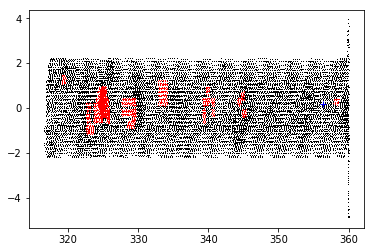

In [42]:
ccd_dir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ebosselg_ccds/'
fn1 = ccd_dir+'survey-ccds-dr3.fits.gz'
fn2 = ccd_dir+'survey-ccds-dr3_utah_sgc.fits'
ccd1 = fits.getdata(fn1)
ccd2 = fits.getdata(fn2)
ccd1 = ccd1[(ccd1['dec']<10)&(ccd1['ra']>200)]
ccd2 = ccd2[(ccd2['dec']<10)&(ccd2['ra']>200)]
plt.plot(ccd1['ra'],ccd1['dec'],'k,')
plt.plot(ccd2['ra'],ccd2['dec'],'r,')
plt.plot([356.3],[0.2],'b+')

(-2, 0)

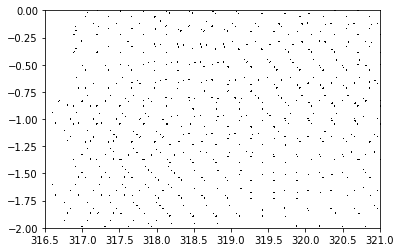

In [47]:
#my test patch 1
ccd_dir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ebosselg_ccds/'
fn1 = ccd_dir+'survey-ccds-dr3.fits.gz'
fn2 = ccd_dir+'survey-ccds-dr3_utah_sgc.fits'
ccd1 = fits.getdata(fn1)
ccd2 = fits.getdata(fn2)
ccd1 = ccd1[(ccd1['dec']<10)&(ccd1['ra']>200)]
ccd2 = ccd2[(ccd2['dec']<10)&(ccd2['ra']>200)]
plt.plot(ccd1['ra'],ccd1['dec'],'k,')
plt.plot(ccd2['ra'],ccd2['dec'],'r,')
plt.plot([356.3],[0.2],'b+')

plt.gca().set_xlim((316.5,321))

plt.gca().set_ylim((-2,0))

In [3]:
!ls /global/project/projectdirs/cosmo/data/legacysurvey/dr3/tractor/075

legacysurvey_dr3_tractor_075.sha1sum  tractor-0751m072.fits
tractor-0750m067.fits		      tractor-0751m075.fits
tractor-0750m077.fits		      tractor-0752m077.fits
tractor-0750m080.fits		      tractor-0752m090.fits
tractor-0750m092.fits		      tractor-0753m072.fits
tractor-0750m095.fits		      tractor-0753m075.fits
tractor-0751m070.fits


In [5]:
import astropy.io.fits as fits
dat = fits.getdata('/global/project/projectdirs/cosmo/data/legacysurvey/dr3/tractor/075/tractor-0750m067.fits')
dat.columns

ColDefs(
    name = 'brickid'; format = 'J'
    name = 'brickname'; format = '8A'
    name = 'objid'; format = 'J'
    name = 'brick_primary'; format = 'L'
    name = 'blob'; format = 'J'
    name = 'ninblob'; format = 'I'
    name = 'tycho2inblob'; format = 'L'
    name = 'type'; format = '4A'
    name = 'ra'; format = 'D'; unit = 'deg'
    name = 'ra_ivar'; format = 'E'; unit = '1/deg^2'
    name = 'dec'; format = 'D'; unit = 'deg'
    name = 'dec_ivar'; format = 'E'; unit = '1/deg^2'
    name = 'bx'; format = 'E'
    name = 'by'; format = 'E'
    name = 'bx0'; format = 'E'
    name = 'by0'; format = 'E'
    name = 'left_blob'; format = 'L'
    name = 'out_of_bounds'; format = 'L'
    name = 'dchisq'; format = '5E'
    name = 'ebv'; format = 'E'; unit = 'mag'
    name = 'cpu_source'; format = 'E'
    name = 'cpu_blob'; format = 'E'
    name = 'blob_width'; format = 'I'
    name = 'blob_height'; format = 'I'
    name = 'blob_npix'; format = 'J'
    name = 'blob_nimages'; format = 'I'


In [71]:
topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/etc/'
exp = 'eboss_elg_dr3deep2_DEV.csv'
import pandas
df = pandas.read_csv(topdir+exp)

Populating the interactive namespace from numpy and matplotlib


(array([   8335.,   28310.,   21068.,   72654.,   94308.,   67576.,
         107012.,  161309.,  151658.,  168423.,  187727.,  240934.,
         301344.,  339053.,  444575.,  443947.,  530562.,  254520.,
         214776.,  302462.]),
 array([ 21.63539505,  21.70485382,  21.77431259,  21.84377136,
         21.91323013,  21.9826889 ,  22.05214767,  22.12160645,
         22.19106522,  22.26052399,  22.32998276,  22.39944153,
         22.4689003 ,  22.53835907,  22.60781784,  22.67727661,
         22.74673538,  22.81619415,  22.88565292,  22.95511169,  23.02457047]),
 <a list of 20 Patch objects>)

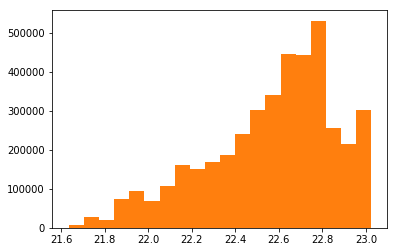

In [61]:
%pylab inline
import matplotlib.pyplot as plt
import pandas
p=plt.hist(df['g'],bins=40)

d0=fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/eboss_elg/randoms_test_2/randoms_seed_79_startid_77060581.fits')

g = d0['g']
gr = d0['g']-d0['r']
rz = d0['r']-d0['z']
color_sgc = (g>21.825)&(g<22.825)&(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.218*gr+0.571<rz)&(rz<-0.555*gr+1.901)
len(d0[color_sgc])/len(d0)
plt.hist(d0['g'],bins=20)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

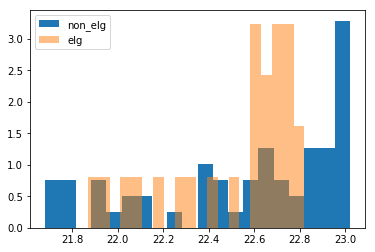

In [72]:
g = df['g']
gr = df['g']-df['r']
rz = df['r']-df['z']
color_sgc = (g>21.825)&(g<22.825)&(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.218*gr+0.571<rz)&(rz<-0.555*gr+1.901)
len(df[color_sgc])/len(df)
#plt.hist(df[~color_sgc]['g'],bins=20)
plt.hist(df[~color_sgc]['g'],bins=20,density=True,label = 'non_elg')
plt.hist(df[color_sgc]['g'],bins=20,alpha=0.5,density=True,label = 'elg')
plt.legend()

len(df[color_sgc])/len(df)
np.random.randint(0,1,10)


In [73]:
eboss_elg_dr3deep2_EXP_trimmed.csv eboss_elg_dr3deep2_DEV_trimmed.csv

59

(array([ 0.08757653,  0.07784581,  0.0389229 ,  0.05838436,  0.01946145,
         0.02919218,  0.21407597,  2.15049045,  3.7074066 ,  1.58610834,
         1.15795639,  0.40869049,  0.33084468,  0.24326815,  0.14596089,
         0.0389229 ,  0.02919218,  0.00973073,  0.        ,  0.01946145]),
 array([  4.14778420e-04,   9.70005444e-02,   1.93586310e-01,
          2.90172076e-01,   3.86757842e-01,   4.83343608e-01,
          5.79929374e-01,   6.76515140e-01,   7.73100906e-01,
          8.69686672e-01,   9.66272438e-01,   1.06285820e+00,
          1.15944397e+00,   1.25602974e+00,   1.35261550e+00,
          1.44920127e+00,   1.54578703e+00,   1.64237280e+00,
          1.73895857e+00,   1.83554433e+00,   1.93213010e+00]),
 <a list of 20 Patch objects>)

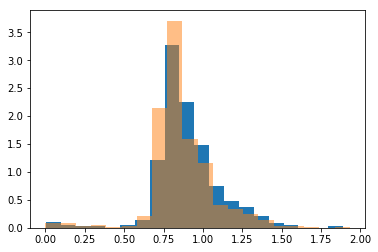

In [69]:
plt.hist(df[df['g']>22.825]['redshift'],bins=20,density=True,label = 'non_elg')
plt.hist(df['redshift'],bins=20,density=True,label = 'non_elg',alpha=0.5)

In [64]:

g = df['g']
gr = df['g']-df['r']
rz = df['r']-df['z']
color_sgc = (g>21.825)&(g<22.825)&(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.218*gr+0.571<rz)&(rz<-0.555*gr+1.901)
len(df[color_sgc])/len(df)
n1=len(df[~color_sgc])
n2=len(df[color_sgc])
idx1=np.random.randint(0,n1,500000)
idx2=np.random.randint(0,n2,560000)
gg=np.hstack((np.array(df[~color_sgc]['g'])[idx1].ravel(),np.array(df[color_sgc]['g'])[idx2].ravel()))


(array([  2888.,   2167.,   2798.,   2872.,   2238.,  19275.,   8200.,
          9633.,   5232.,  15521.,  18456.,  14246.,  25087.,  17772.,
         24698.,  26046.,  35618.,  42655.,  41530.,  53178.,  69606.,
         60382.,  57536.,  77014.,  83013.,  72538.,  52021.,  67147.,
         71796.,  78837.]),
 array([ 21.62722778,  21.67381509,  21.7204024 ,  21.76698971,
         21.81357702,  21.86016432,  21.90675163,  21.95333894,
         21.99992625,  22.04651356,  22.09310087,  22.13968817,
         22.18627548,  22.23286279,  22.2794501 ,  22.32603741,
         22.37262472,  22.41921202,  22.46579933,  22.51238664,
         22.55897395,  22.60556126,  22.65214856,  22.69873587,
         22.74532318,  22.79191049,  22.8384978 ,  22.88508511,
         22.93167241,  22.97825972,  23.02484703]),
 <a list of 30 Patch objects>)

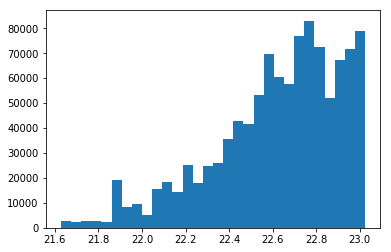

In [66]:
plt.hist(gg.ravel(),bins=30)

In [21]:
sim = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/sim_elg_ngc_run_chunk23_really_masked.fits')


In [26]:
def elg_selection(dat):
    g = dat['g']
    r = dat['r']
    z = dat['z']
    rz = r-z
    gr=g-r
    color_ngc = (g>21.825)&(g<22.9)&(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773)&(0.637*gr+0.399<rz)&(rz<-0.555*gr+1.901)
    return dat[color_ngc]
import numpy as np
topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/eboss_elg/sgc_brick_dat_2/'
dat = fits.getdata(topdir+'brick_0126p002.fits')




(array([  12.,    7.,   13.,   37.,   19.,   39.,   52.,  107.,  123.,
         105.,   46.,   99.,  105.,  122.,  223.,  175.,  173.,  157.,
         167.,  223.,  189.,  221.,  277.,  272.,  382.,  301.,  405.,
         367.,  526.,  463.,  469.,  491.,  587.,  602.,  409.,  169.,
         305.,  182.,  313.,  339.]),
 array([ 21.63539505,  21.67012444,  21.70485382,  21.73958321,
         21.77431259,  21.80904198,  21.84377136,  21.87850075,
         21.91323013,  21.94795952,  21.9826889 ,  22.01741829,
         22.05214767,  22.08687706,  22.12160645,  22.15633583,
         22.19106522,  22.2257946 ,  22.26052399,  22.29525337,
         22.32998276,  22.36471214,  22.39944153,  22.43417091,
         22.4689003 ,  22.50362968,  22.53835907,  22.57308846,
         22.60781784,  22.64254723,  22.67727661,  22.712006  ,
         22.74673538,  22.78146477,  22.81619415,  22.85092354,
         22.88565292,  22.92038231,  22.95511169,  22.98984108,  23.02457047]),
 <a list of 40 Patch o

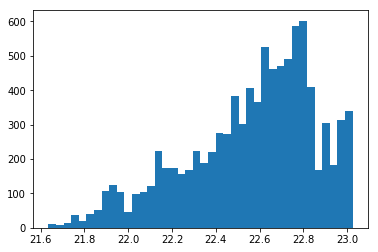

In [90]:
topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/eboss_elg/sgc_brick_dat_2/'
dat = fits.getdata(topdir+'brick_0126p002.fits')
plt.hist(dat['g'],bins=40)

In [29]:
elg = elg_selection(dat)

In [30]:
len(elg)/len(dat)

0.45778065351019087

In [72]:
%pylab inline
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import numpy as np

Populating the interactive namespace from numpy and matplotlib


(array([  15.,    8.,    2.,  133.,  334.,  126.,   47.,   20.,    4.,    2.]),
 array([  4.14778420e-04,   1.89307055e-01,   3.78199331e-01,
          5.67091607e-01,   7.55983883e-01,   9.44876159e-01,
          1.13376844e+00,   1.32266071e+00,   1.51155299e+00,
          1.70044526e+00,   1.88933754e+00]),
 <a list of 10 Patch objects>)

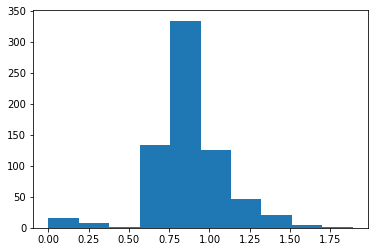

In [85]:
plt.hist(df[~color_sgc]['redshift'])

In [44]:
df['redshift'].values.reshape(-1,1)

array([[ 0.78881806],
       [ 0.77111721],
       [ 0.7769044 ],
       ..., 
       [ 0.80752951],
       [ 0.81275427],
       [ 1.13707638]])

In [47]:
df['redshift'].values

array([ 0.78881806,  0.77111721,  0.7769044 , ...,  0.80752951,
        0.81275427,  1.13707638])

In [66]:
topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/etc/'
cov = np.loadtxt(topdir+'eboss_nz_elg_covars.txt')
mean = np.loadtxt(topdir+'eboss_nz_elg_means.txt')
weights = np.loadtxt(topdir+'eboss_nz_elg_weights.txt')

<Container object of 3 artists>

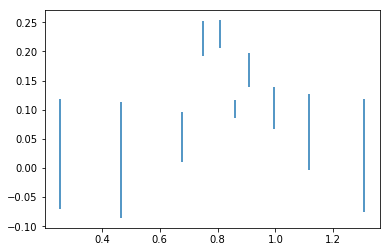

In [86]:
plt.errorbar(mean,weights,np.sqrt(cov),linestyle='none')

In [79]:
mean,weights

(array([ 0.85997948,  0.25518102,  1.11699887,  0.74945333,  0.90779351,
         1.30715966,  0.99565904,  0.67591473,  0.46513891,  0.80936842]),
 array([ 0.10111207,  0.02436764,  0.06181214,  0.22285547,  0.168377  ,
         0.020978  ,  0.10294156,  0.05371289,  0.01385917,  0.22998407]))

In [4]:
#real ngc elgs
elg = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/eBOSS_ELG_clustering_eboss23_v5.dat.fits')

In [6]:
p = plt.hist(df['redshift'],density = True,histtype='step')
p[0]

NameError: name 'df' is not defined

(0, 2)

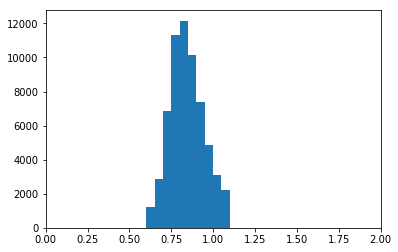

In [83]:
plt.hist(elg['Z'],weights = elg['WEIGHT_NOZ']*elg['WEIGHT_CP'])
plt.gca().set_xlim((0,2))

In [10]:
dat = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/eBOSS_ELG_full_ALL_v4.dat.fits')
p = plt.hist(dat[(dat['Z']<2)&(dat['Z']>0)]['Z'],weights = dat[(dat['Z']<2)\
                                                           &(dat['Z']>0)]['WEIGHT_CP']*dat[(dat['Z']<2)\
                                                                    &(dat['Z']>0)]['WEIGHT_NOZ']\
         ,density=True,bins=10)


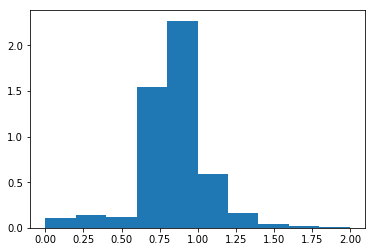

In [27]:
p = plt.hist(dat[(dat['Z']<2)&(dat['Z']>0)]['Z'],weights = dat[(dat['Z']<2)\
                                                           &(dat['Z']>0)]['WEIGHT_CP']*dat[(dat['Z']<2)\
                                                                    &(dat['Z']>0)]['WEIGHT_NOZ']\
         ,density=True,bins=10)

In [44]:
dd = dat[(dat['Z']<2)&(dat['Z']>0)]
ll=[]
lx=[]
for left,right in np.array([p[1][:-1],p[1][1:]]).transpose():
    di = dd[(dd['Z']>left)&(dd['Z']<right)]
    ll.append((di['Z']*di['WEIGHT_NOZ']*di['WEIGHT_CP']).sum())
    lx.append((left+right)/2.)


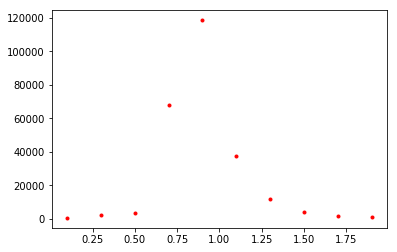

In [46]:
plt.plot(lx,ll,'r.')

In [73]:
topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/etc/'
cov = np.loadtxt(topdir+'eboss_nz_elg_covars.txt')
mean = np.loadtxt(topdir+'eboss_nz_elg_means.txt')
weights = np.loadtxt(topdir+'eboss_nz_elg_weights.txt')

ValueError: x and y must have same first dimension, but have shapes (10,) and (11,)

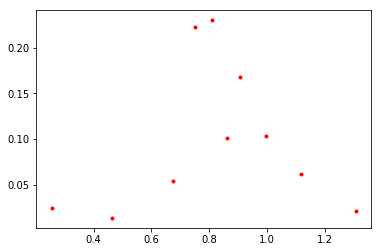

In [25]:
plt.plot(mean,weights,'r.')
plt.plot(px,py*mean.max())

In [22]:
mean.min()

0.25518101904054225

In [24]:
px

array([ 0.11109584,  0.13667636,  0.11883851,  1.5438077 ,  2.26875486,
        0.58981674,  0.15758338,  0.04553265,  0.02009597,  0.00841361])

In [28]:
p

(array([ 0.11109584,  0.13667636,  0.11883851,  1.5438077 ,  2.26875486,
         0.58981674,  0.15758338,  0.04553265,  0.02009597,  0.00841361]),
 array([  3.02704916e-08,   1.99975409e-01,   3.99950787e-01,
          5.99926166e-01,   7.99901544e-01,   9.99876922e-01,
          1.19985230e+00,   1.39982768e+00,   1.59980306e+00,
          1.79977844e+00,   1.99975381e+00]),
 <a list of 10 Patch objects>)

In [30]:
x = (p[1][:-1]+p[1][1:])/2.

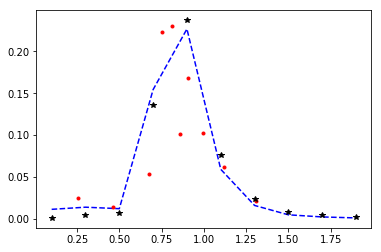

In [49]:
plt.plot(x,p[0]/p[0].sum()/2,'b--')
plt.plot(mean,weights,'r.')
ll=np.array(ll)
plt.plot(lx,ll/ll.sum()/2,'k*')

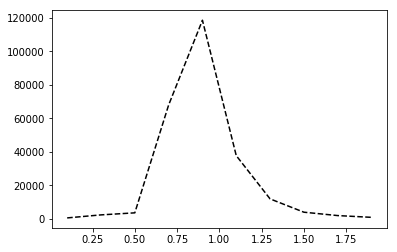

In [52]:
plt.plot(lx,ll,'k--')

NameError: name 'weights' is not defined

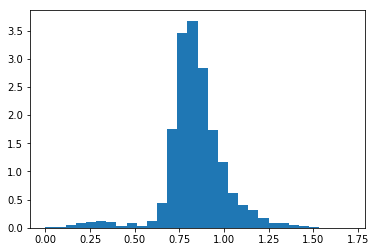

In [56]:
import astropy.io.fits as fits
d0=fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/eboss_elg/randoms_test_2/randoms_seed_79_startid_77060581.fits')
plt.hist(d0['nn_redshift'],bins=30,density=True)
plt.plot(mean,weights*16,'r.')
plt.plot(lx,ll/ll.sum()*7,'k--')

In [57]:
d0.columns

ColDefs(
    name = 'redshift'; format = 'D'
    name = 'g'; format = 'D'
    name = 'r'; format = 'D'
    name = 'z'; format = 'D'
    name = 'nn_redshift'; format = 'D'
    name = 'n'; format = 'D'
    name = 'id_sample'; format = '32A'
    name = 'rhalf'; format = 'D'
    name = 'id'; format = 'J'
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'ba'; format = 'D'
    name = 'pa'; format = 'D'
)

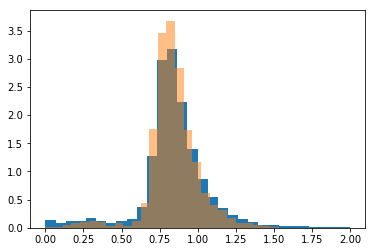

In [87]:
dat = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/eBOSS_ELG_full_ALL_v4.dat.fits')
p = plt.hist(dat[(dat['Z']<2)&(dat['Z']>0)]['Z'],weights = dat[(dat['Z']<2)\
                                                           &(dat['Z']>0)]['WEIGHT_CP']*dat[(dat['Z']<2)\
                                                                    &(dat['Z']>0)]['WEIGHT_NOZ']\
         ,density=True,bins=30)

p2=plt.hist(d0['nn_redshift'],bins=30,density=True,alpha=0.5)


<Container object of 10 artists>

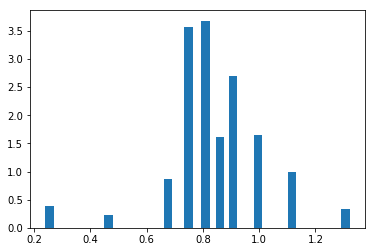

In [94]:
plt.bar(mean,weights*16,width=0.03)

In [95]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.mixture import GMM

In [97]:
np.random.seed(1)

gmm = GMM(3, n_iter=1)
gmm.means_ = np.array([[-1], [0], [3]])
gmm.covars_ = np.array([[1.5], [1], [0.5]]) ** 2
gmm.weights_ = np.array([0.3, 0.5, 0.2])

X = gmm.sample(1000)

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)


AttributeError: 'GMM' object has no attribute 'eval'

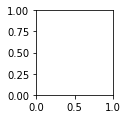

In [99]:
fig = plt.figure(figsize=(5, 1.7))
fig.subplots_adjust(left=0.12, right=0.97,
                    bottom=0.21, top=0.9, wspace=0.5)


# plot 1: data + best-fit mixture
ax = fig.add_subplot(131)
M_best = models[np.argmin(AIC)]

x = np.linspace(-6, 6, 1000)
logprob, responsibilities = M_best.eval(x)
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

In [101]:
from sklearn.neighbors.kde import KernelDensity
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
kde.score_samples(X)

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

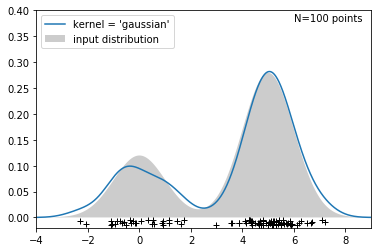

In [106]:


# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')

for kernel in ['gaussian']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.6).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()


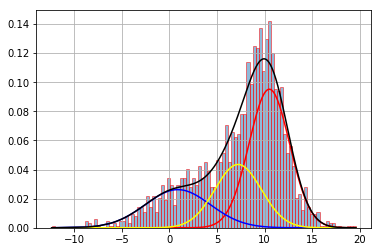

In [117]:
from matplotlib import rc
from sklearn import mixture
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.ticker as tkr
import scipy.stats as stats

x = np.concatenate((np.random.normal(5, 5, 1000),np.random.normal(10, 2, 1000)))

f = np.ravel(x).astype(np.float)
f=f.reshape(-1,1)
g = mixture.GaussianMixture(n_components=3,covariance_type='full')
g.fit(f)
weights = g.weights_
means = g.means_
covars = g.covariances_

plt.hist(f, bins=100, histtype='bar', density=True, ec='red', alpha=0.5)

f_axis = f.copy().ravel()
f_axis.sort()
plt.plot(f_axis,weights[0]*stats.norm.pdf(f_axis,means[0],np.sqrt(covars[0])).ravel(), c='red')
plt.plot(f_axis,weights[1]*stats.norm.pdf(f_axis,means[1],np.sqrt(covars[1])).ravel(), c='blue')
plt.plot(f_axis,weights[2]*stats.norm.pdf(f_axis,means[2],np.sqrt(covars[2])).ravel(), c='yellow')
y=weights[0]*stats.norm.pdf(f_axis,means[0],np.sqrt(covars[0])).ravel()+\
weights[1]*stats.norm.pdf(f_axis,means[1],np.sqrt(covars[1])).ravel()+\
weights[2]*stats.norm.pdf(f_axis,means[2],np.sqrt(covars[2])).ravel()
plt.plot(f_axis,y,color='black')
plt.rcParams['agg.path.chunksize'] = 10000

plt.grid()
plt.show()

In [109]:
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

In [116]:
g.weights_

array([ 0.48372675,  0.24732859,  0.26894466])

0.0


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:817: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bins


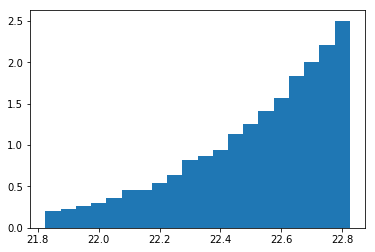

In [130]:
dat=fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/eboss_elg/test_randoms/randoms_seed_1_startid_2.fits')

g = dat['g']
gr = dat['g']-dat['r']
rz = dat['r']-dat['z']
color_sgc = (g>21.825)&(g<22.825)&(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.218*gr+0.571<rz)&(rz<-0.555*gr+1.901)
len(dat[color_sgc])/len(dat)
p=plt.hist(dat[color_sgc]['g'],density=True,bins=20)


topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/etc/'
exp = 'eboss_elg_dr3deep2_EXP_trimmed.csv'
import pandas
df = pandas.read_csv(topdir+exp)

g = df['g']
gr = df['g']-df['r']
rz = df['r']-df['z']
color_sgc = (g>21.825)&(g<22.825)&(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.218*gr+0.571<rz)&(rz<-0.555*gr+1.901)
print(len(df[color_sgc])/len(df))

p=plt.hist(df[color_sgc]['g'],density=True,alpha=0.5,bins=20)



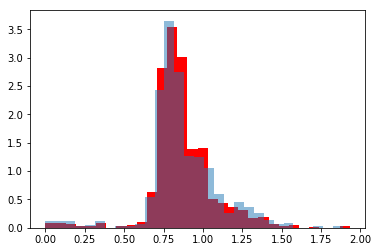

In [114]:
topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/etc/'
exp = 'eboss_elg_dr3deep2_EXP.csv'
import pandas
ds = pandas.read_csv(topdir+exp)

plt.hist(ds['redshift'],color='red',density=True,bins=30)
p=plt.hist(df['redshift'],density=True,alpha=0.5,bins=30)

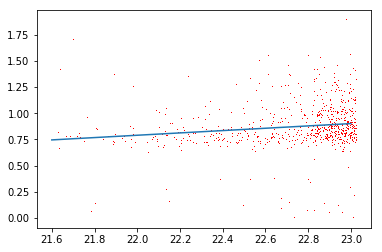

In [126]:
plt.plot(df['g'],df['redshift'],'r,')
x=np.arange(21.6,23.1,0.1)
plt.plot(x,b*x+k)

(array([   8.,    7.,    2.,    6.,    0.,    2.,   12.,  121.,  215.,
         119.,   84.,   42.,   22.,   25.,   15.,    5.,    4.,    0.,
           1.,    1.]),
 array([  4.14778420e-04,   9.48609165e-02,   1.89307055e-01,
          2.83753193e-01,   3.78199331e-01,   4.72645469e-01,
          5.67091607e-01,   6.61537745e-01,   7.55983883e-01,
          8.50430021e-01,   9.44876159e-01,   1.03932230e+00,
          1.13376844e+00,   1.22821457e+00,   1.32266071e+00,
          1.41710685e+00,   1.51155299e+00,   1.60599913e+00,
          1.70044526e+00,   1.79489140e+00,   1.88933754e+00]),
 <a list of 20 Patch objects>)

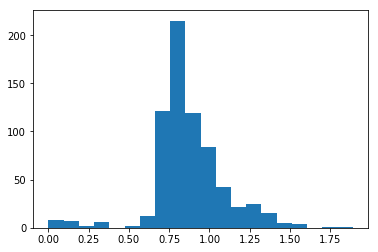

In [128]:
plt.hist(df['redshift'],bins=20)

In [121]:
b,k=numpy.polyfit(df['g'],df['redshift'],1)

In [39]:
np.array(df[~color_sgc]['g'])[idx1]

array([ 22.91976929,  22.95592499,  22.7290535 ,  22.5729351 ,
        22.84854889,  23.01107597,  22.49307251,  22.94579506,
        22.85993385,  22.98003197,  22.98537827,  22.89755821,
        21.97960854,  22.92005539,  22.9909687 ,  22.68939209,
        22.77958298,  22.90615463,  22.37925529,  22.98295021,
        22.88850975,  22.8462944 ,  22.7713356 ,  22.85909462,
        22.84334373,  22.46880531,  22.91976929,  22.87211609,
        22.96588516,  22.95802307,  22.46622849,  22.23435974,
        23.01107597,  22.75428391,  22.85647392,  22.96211433,
        22.61314011,  22.80381203,  22.82668114,  22.65942764,
        23.02361298,  22.84296417,  22.87211609,  23.02177048,
        22.75428391,  22.18031693,  22.95649338,  22.84366798,
        22.92378235,  22.86929131,  23.0050354 ,  22.31800079,
        22.34697533,  22.96789932,  22.85652542,  22.89048958,
        22.99464989,  22.96882629,  22.42062569,  22.21912766,
        21.62722778,  22.96588516,  22.5757122 ,  22.20

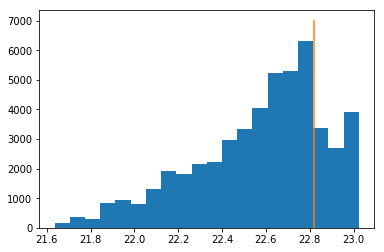

In [89]:
p = plt.hist(dat['g'],bins=20)
plt.plot([22.82]*2,[0,7000])

In [87]:
dat=fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/eboss_elg/test_randoms/randoms_seed_1_startid_1.fits')

g = dat['g']
gr = dat['g']-dat['r']
rz = dat['r']-dat['z']
color_sgc = (g>21.825)&(g<22.825)&(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.218*gr+0.571<rz)&(rz<-0.555*gr+1.901)
len(dat[color_sgc])/len(dat)

0.56284

In [ ]:
topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/etc/'
exp = 'eboss_elg_dr3deep2_EXP.csv'
import pandas
df = pandas.read_csv(topdir+exp)